In [3]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [4]:
fixed = np.load("fixed.npy")
random = np.load("random.npy")

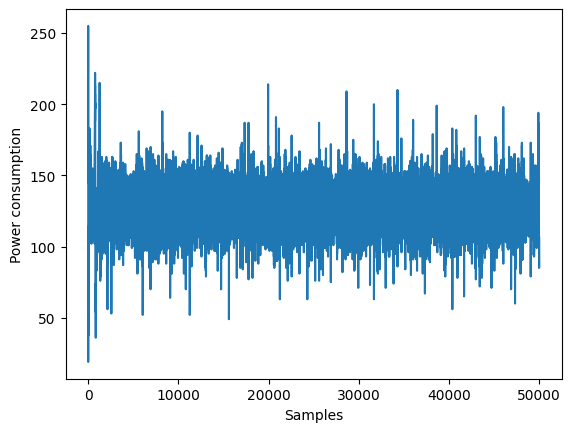

In [6]:
plt.plot(fixed[0], )
plt.xlabel("Samples")
plt.ylabel("Power consumption")
plt.show()

In [35]:
t_score = stats.ttest_ind(fixed, random, equal_var=False)

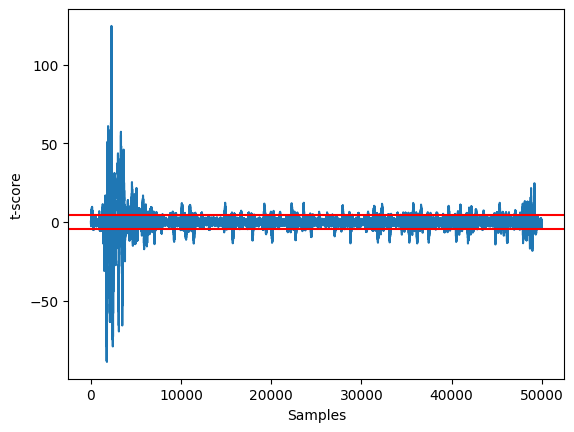

In [36]:
plt.plot(t_score.statistic)
# Horizonatal lines at y=4.5 and y=-4.5
plt.axhline(y=4.5, color='r', linestyle='-')
plt.axhline(y=-4.5, color='r', linestyle='-')
plt.xlabel("Samples")
plt.ylabel("t-score")
plt.show()

In [37]:
leaky_samples_num = 0
leaky = []

for i in range(0, len(t_score.statistic)):
    if abs(t_score.statistic[i]) > 4.5:
        leaky.append(i)
        leaky_samples_num += 1

print("Leaky samples number: ", leaky_samples_num)

Leaky samples number:  8070


In [49]:
t_score.statistic[2618]

20.647348132328723

In [50]:
t_score.pvalue[2618]

8.748301011040989e-93

# Chi^2

In [ ]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [83]:
sample_index = 2550 + ((94+42)//2)

In [100]:
# Chi-square
F_fixed, bins_fixed = np.histogram(fixed[:,sample_index], bins=256)
F_random, bins_random = np.histogram(random[:,sample_index], bins=256)

In [101]:
contingency_table = np.array([F_fixed, F_random])

zero_cols = np.all(contingency_table == 0, axis=0)

# Invert the boolean array so that True means the column is not all zeros
non_zero_cols = ~zero_cols

# Select only the columns that are not all zeros
contingency_table = contingency_table[:, non_zero_cols]

contingency_table

array([[  2,   4,   1,   2,   9,   0,  17,   0,  31,   0,  48,   0,  41,
          0,  97,   0,  86, 130,   0, 142,   0, 150,   0, 176,   0, 255,
          0, 214,   0, 452, 408, 645,   0, 476,   0, 558,   0, 356,   0,
        355,   0, 127,   0, 125,  43,   0,  19,   0,  12,   0,   7,   0,
          1,   0,   3,   2,   1,   0,   1,   0,   3,   0,   1],
       [  1,   0,   0,   0,   1,   1,   0,   1,   0,   3,   0,   5,   0,
         20,   0,  19,  44,  53,  77,   0,  71,   0, 138,   0, 130,   0,
        179,   0, 157, 231, 238, 445, 318,   0, 654,   0, 511,   0, 637,
          0, 341,   0, 327, 176, 115,  49,   0,  30,   0,   8,   0,   6,
          0,   2,   0,   4,   2,   2,   0,   2,   0,   1,   1]])

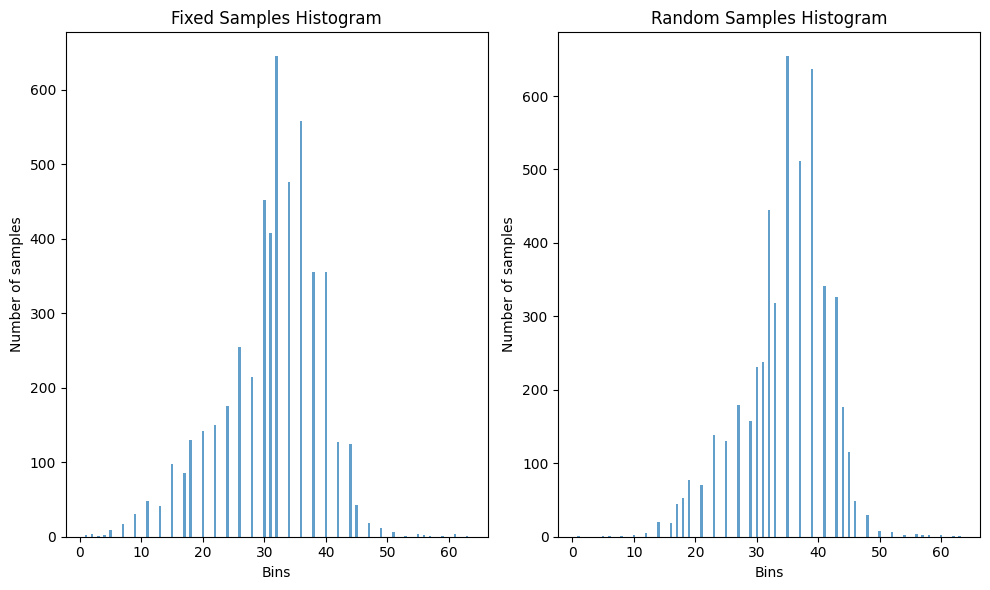

In [102]:
fixed_data = contingency_table[0,:]
random_data = contingency_table[1,:]
bins = np.arange(1, len(fixed_data) + 1)

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.bar(bins, fixed_data, width=0.4, align='center', alpha=0.7, label='Fixed Data')
plt.xlabel('Bins')
plt.ylabel('Number of samples')
plt.title('Fixed Samples Histogram')

plt.subplot(1,2,2)
plt.bar(bins, random_data, width=0.4, align='center', alpha=0.7, label='Random Data')
plt.xlabel('Bins')
plt.ylabel('Number of samples')
plt.title('Random Samples Histogram')
plt.tight_layout()
plt.show()

In [55]:
F_fixed, bins_fixed = np.histogram(fixed[:,sample_index], bins=256)
F_random, bins_random = np.histogram(random[:,sample_index], bins=256)

In [103]:
contingency_table = np.array([F_fixed, F_random])

zero_cols = np.all(contingency_table == 0, axis=0)

# Invert the boolean array so that True means the column is not all zeros
non_zero_cols = ~zero_cols

# Select only the columns that are not all zeros
contingency_table = contingency_table[:, non_zero_cols]

contingency_table

array([[  2,   4,   1,   2,   9,   0,  17,   0,  31,   0,  48,   0,  41,
          0,  97,   0,  86, 130,   0, 142,   0, 150,   0, 176,   0, 255,
          0, 214,   0, 452, 408, 645,   0, 476,   0, 558,   0, 356,   0,
        355,   0, 127,   0, 125,  43,   0,  19,   0,  12,   0,   7,   0,
          1,   0,   3,   2,   1,   0,   1,   0,   3,   0,   1],
       [  1,   0,   0,   0,   1,   1,   0,   1,   0,   3,   0,   5,   0,
         20,   0,  19,  44,  53,  77,   0,  71,   0, 138,   0, 130,   0,
        179,   0, 157, 231, 238, 445, 318,   0, 654,   0, 511,   0, 637,
          0, 341,   0, 327, 176, 115,  49,   0,  30,   0,   8,   0,   6,
          0,   2,   0,   4,   2,   2,   0,   2,   0,   1,   1]])

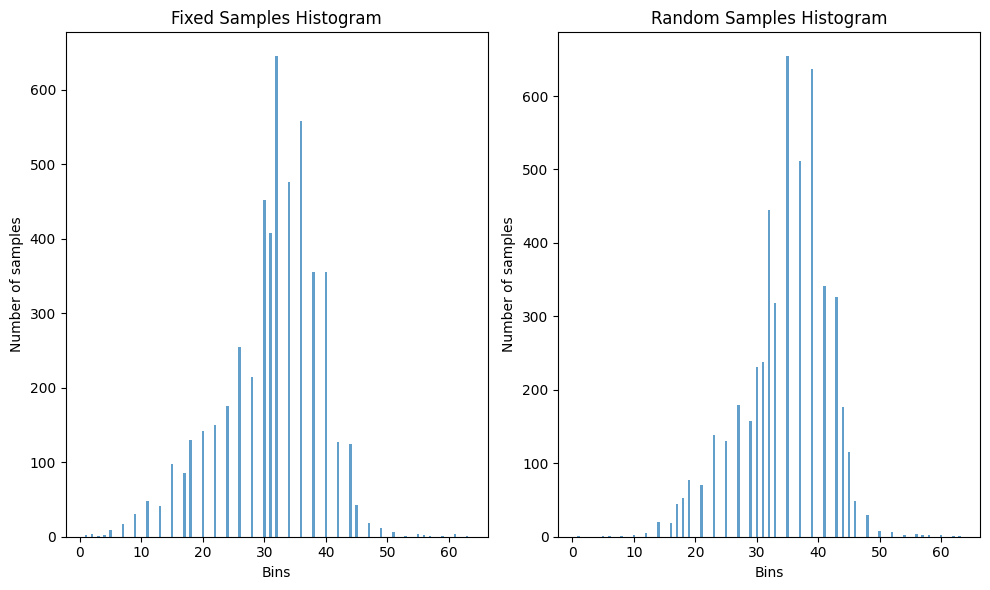

In [104]:
fixed_data = contingency_table[0,:]
random_data = contingency_table[1,:]
bins = np.arange(1, len(fixed_data) + 1)

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.bar(bins, fixed_data, width=0.4, align='center', alpha=0.7, label='Fixed Data')
plt.xlabel('Bins')
plt.ylabel('Number of samples')
plt.title('Fixed Samples Histogram')

plt.subplot(1,2,2)
plt.bar(bins, random_data, width=0.4, align='center', alpha=0.7, label='Random Data')
plt.xlabel('Bins')
plt.ylabel('Number of samples')
plt.title('Random Samples Histogram')
plt.tight_layout()
plt.show()

In [85]:
def chi_square_test(F_fixed, F_random, bins=256, sample=0):
    F_fixed, bins_fixed = np.histogram(fixed[:,sample], bins=bins)
    F_random, bins_random = np.histogram(random[:,sample], bins=bins)

    contingency_table = np.array([F_fixed, F_random])

    zero_cols = np.all(contingency_table == 0, axis=0)

    non_zero_cols = ~zero_cols

    contingency_table = contingency_table[:, non_zero_cols]

    x, p, dof, expected = chi2_contingency(contingency_table)

    return x, p, dof, expected


In [94]:
p_list = []
bins = 5
for i in range(len(fixed[0])):
    x, p, dof, expected = chi_square_test(fixed, random, bins=bins, sample=i)
    p_list.append(p)

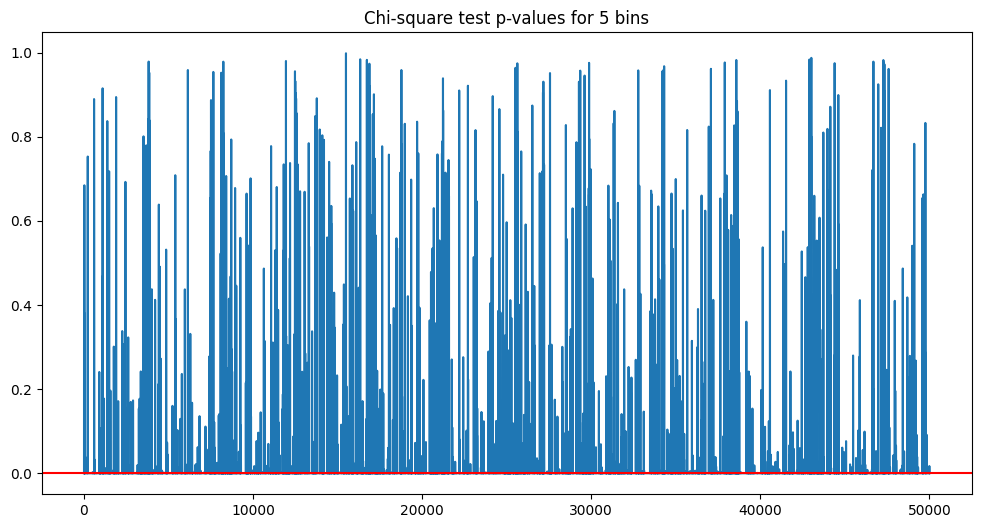

In [95]:
# Make the figure wider to see the x-axis labels
plt.figure(figsize=(12, 6))
plt.title(f"Chi-square test p-values for {bins} bins")
plt.plot(p_list)
plt.axhline(y=1e-5, color='r', linestyle='-')

In [105]:
plt_list = []
for i in range(len(fixed[0])):
    x, p, dof, expected = chi_square_test(fixed, random, bins=5, sample=i)
    plt_list.append(p)

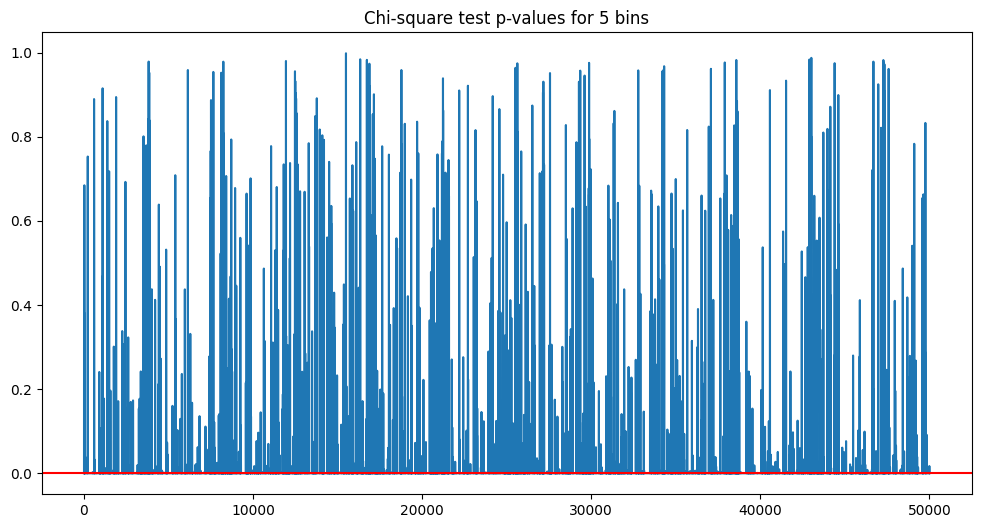

In [106]:
plt.figure(figsize=(12, 6))
plt.title(f"Chi-square test p-values for 5 bins")
plt.plot(plt_list)
plt.axhline(y=1e-5, color='r', linestyle='-')

In [107]:
plt_list = []
for i in range(len(fixed[0])):
    x, p, dof, expected = chi_square_test(fixed, random, bins=256, sample=i)
    plt_list.append(p)

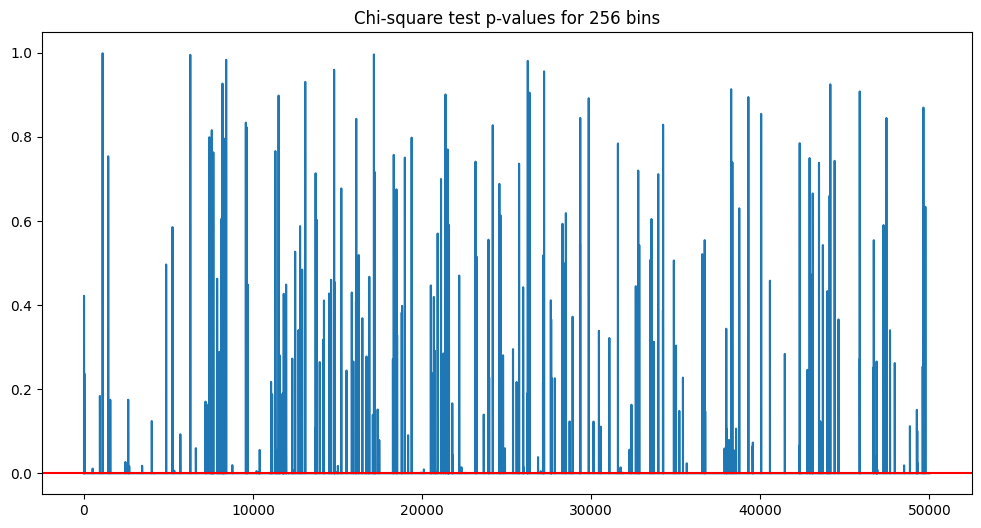

In [108]:
plt.figure(figsize=(12, 6))
plt.title(f"Chi-square test p-values for 256 bins")
plt.plot(plt_list)
plt.axhline(y=1e-5, color='r', linestyle='-')

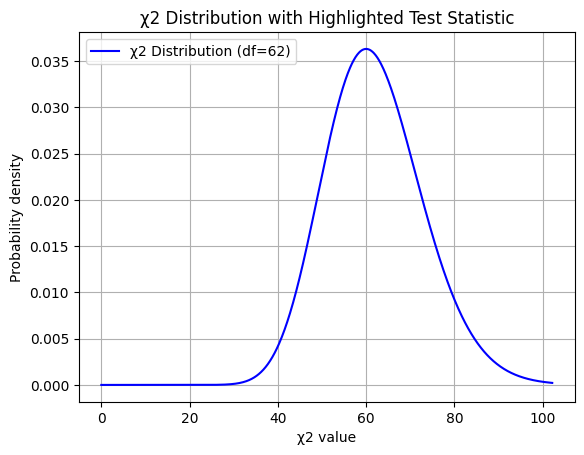

In [34]:
# chi2_value = 670 # Example value
df = 62  # Degrees of freedom from your test
p_value = 0.0  # Example p-value

# Generate χ2 distribution values
x = np.linspace(0, chi2.ppf(0.999, df), 1000)
y = chi2.pdf(x, df)

# Plot the χ2 distribution curve
plt.plot(x, y, 'b-', label=f'χ2 Distribution (df={df})')

# Highlight your χ2 value on the curve
# plt.plot(chi2_value, chi2.pdf(chi2_value, df), 'ro', label=f'χ2 Value = {chi2_value}\np-value = {p_value}')

# Annotations
# plt.vlines(chi2_value, 0, chi2.pdf(chi2_value, df), colors='r', linestyles='--')
# plt.text(chi2_value, chi2.pdf(chi2_value, df) / 2, f' χ2={chi2_value}\n p={p_value}', va='bottom', ha='right')

plt.xlabel('χ2 value')
plt.ylabel('Probability density')
plt.title('χ2 Distribution with Highlighted Test Statistic')
plt.legend()
plt.grid(True)
plt.show()